In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('historical_data.csv')

In [14]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [16]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [17]:
df.shape

(197428, 16)

In [18]:
df['estimated_store_to_consumer_driving_duration'].agg(['mean','max','min'])

mean     545.358935
max     2088.000000
min        0.000000
Name: estimated_store_to_consumer_driving_duration, dtype: float64

In [19]:
from datetime import datetime

 #### Adding features

In [20]:
# total free dasher which are available out of the total_onshift dashers
df['total_free_dashers']=df['total_onshift_dashers']-df['total_busy_dashers']

In [21]:
df['total_free_dashers']=df['total_free_dashers'].apply(lambda x:0 if x<0 else x)

In [22]:
#Calculating total_time taken from order creation to order delivery

In [23]:
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])

In [24]:
df['total_time_taken']=df['actual_delivery_time']-df['created_at']

In [25]:
df['total_time_taken']=df['total_time_taken'].dt.total_seconds()

In [26]:
df['created_at_hour']=df['created_at'].dt.hour

In [27]:
#Checking if store_primary_category has any effect on the dependent feature
df['store_primary_category'].fillna('random',inplace=True)

<AxesSubplot:xlabel='store_primary_category'>

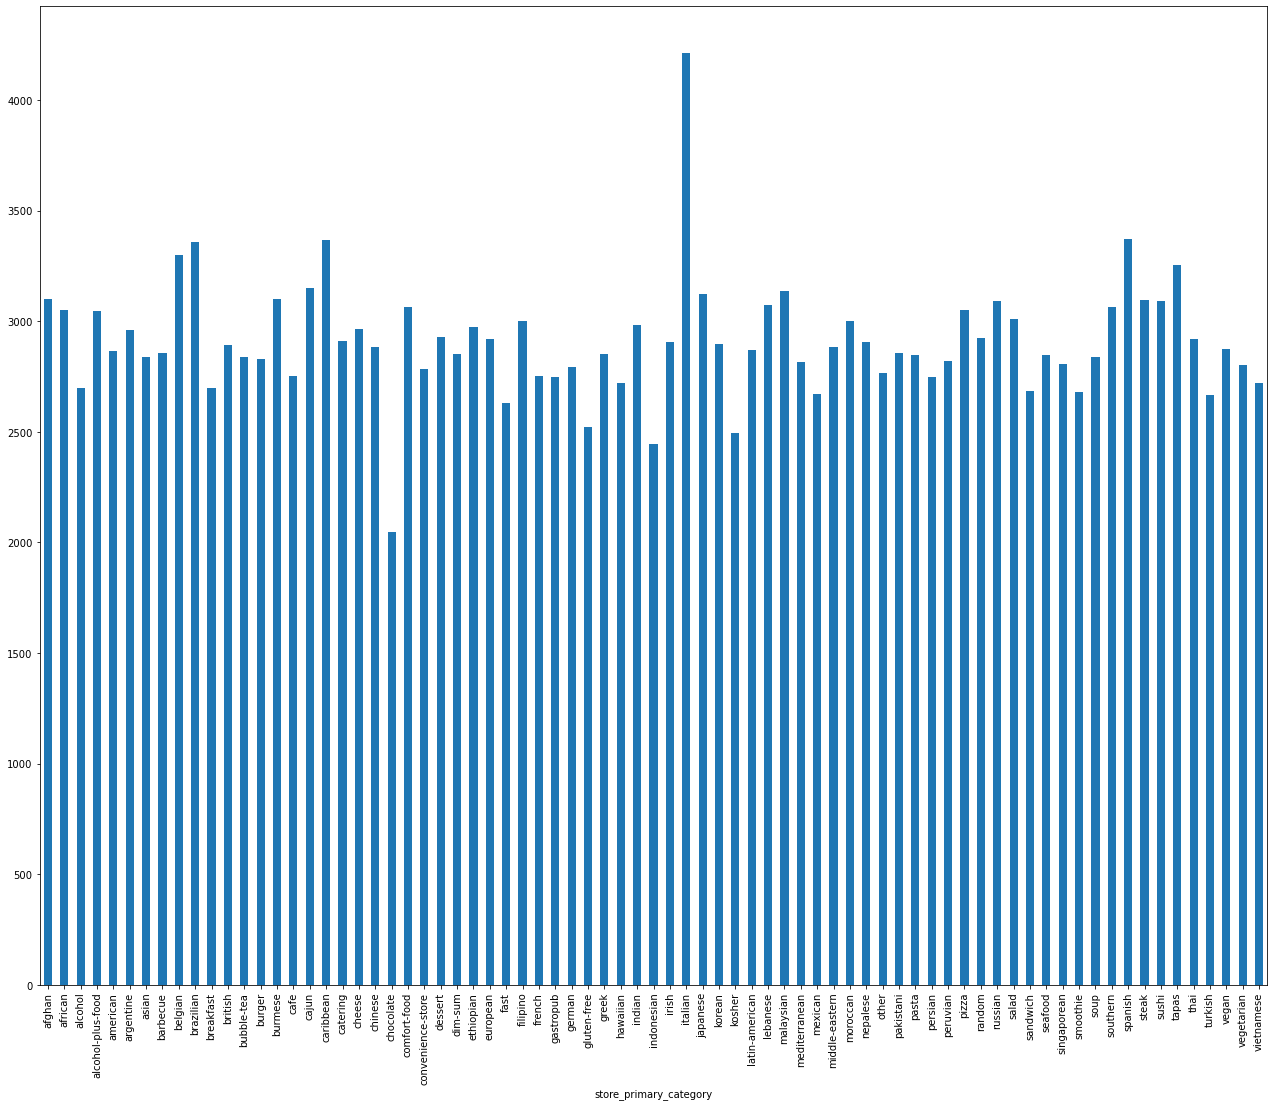

In [28]:
f,ax=plt.subplots(figsize=(22,18))
df.groupby('store_primary_category')['total_time_taken'].mean().plot.bar()

In [29]:
# f,ax=plt.subplots(figsize=(18,12))
df.groupby('created_at_hour')['total_time_taken'].mean()

created_at_hour
0       2648.019023
1       2936.328627
2       3299.175290
3       3154.102113
4       2676.364918
5       3602.712232
6       2444.800141
7       2755.000000
8     203284.500000
14      4057.600000
15      3183.336431
16      2862.302513
17      2654.777615
18      2456.667255
19      2771.253600
20      2656.021915
21      2465.231769
22      2526.855232
23      2609.079750
Name: total_time_taken, dtype: float64

In [30]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'total_free_dashers',
       'total_time_taken', 'created_at_hour'],
      dtype='object')

In [31]:
df.drop(['created_at','market_id','actual_delivery_time','store_primary_category'],axis=1,inplace=True)

In [32]:
df.isnull().sum()

store_id                                            0
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
total_free_dashers                              16262
total_time_taken                                    7
created_at_hour                                     0
dtype: int64

#### Train Test split

In [33]:
from sklearn.model_selection import train_test_split

In [48]:
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)

In [52]:
train_df.head()

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_free_dashers,total_time_taken,created_at_hour
178523,1659,2.0,2,1298,2,399,899,0.0,0.0,0.0,251,821.0,0.0,2613.0,2
89414,3748,2.0,2,1690,2,795,895,78.0,64.0,75.0,251,406.0,14.0,2279.0,4
94190,6750,1.0,2,3300,2,1150,1450,63.0,66.0,90.0,446,296.0,0.0,1803.0,3
136117,6456,1.0,1,3029,1,3029,3029,23.0,15.0,15.0,446,773.0,8.0,2924.0,0
53337,6889,1.0,2,3390,2,1695,1695,71.0,98.0,91.0,446,758.0,0.0,3886.0,1


#### Train validation split

In [36]:
#Sepereating the independent and dependent variables

df_train_train,df_train_val = train_test_split(train_df, test_size=0.2, random_state=42)

In [37]:
df_train_train.head()

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_free_dashers,total_time_taken,created_at_hour
111166,5356,3.0,1,1300,1,1300,1300,NaN,NaN,NaN,251,667.0,NaN,2673.0,3
16278,6195,3.0,1,799,1,799,799,29.0,13.0,17.0,251,195.0,16.0,1226.0,4
130346,3895,5.0,2,2245,2,795,1450,4.0,4.0,4.0,251,568.0,0.0,3016.0,18
138805,5683,1.0,3,4100,3,1100,1500,NaN,NaN,NaN,446,981.0,NaN,3145.0,3
133965,639,1.0,1,1195,1,1195,1195,11.0,8.0,8.0,446,344.0,3.0,2094.0,2


In [38]:
from scipy.stats import zscore

In [39]:
#Getting extreme outliers using the zscore method
def outlierDetectionUsingZScore(df):
    mean=df['total_time_taken'].mean()
    std=df['total_time_taken'].std()
    outlier=[]

    for i in df['total_time_taken']:
        z=(i-mean)/std
        if abs(z)>2:
            outlier.append(i)
            
    #Removing initial extreme outliers 
    return df[~df['total_time_taken'].isin(outlier)]

In [40]:
#Removing initial extreme outliers from train and val data
df_train_train=outlierDetectionUsingZScore(df_train_train)
df_train_val=outlierDetectionUsingZScore(df_train_val)
# y_train=outlierDetectionUsingZScore(y_train)
# y_val=outlierDetectionUsingZScore(y_val)


In [91]:
#Removing the initial extreme outliers from test data
test_df=outlierDetectionUsingZScore(test_df)

In [41]:
# df=df[~df['total_time_taken'].isin(outlier)]

In [42]:
#getting 2nd set of outliers after removing the most extremes
def outlierDetectionUsingQuantile(df):
    Q1 = df['total_time_taken'].quantile(0.35)
    Q3 = df['total_time_taken'].quantile(0.75)

    # Calculate the IQR for each column
    IQR = Q3 - Q1

    # Identify outliers using a threshold (e.g., values outside 1.5 times the IQR)
    outliers = df[(df['total_time_taken'] < Q1 - 1.5 * IQR) | (df['total_time_taken'] > Q3 + 1.5 * IQR)]['total_time_taken']
    
    return df[~df['total_time_taken'].isin(outliers)]

In [43]:
#removing 2nd set of outliers from the dataset

df_train_train=outlierDetectionUsingQuantile(df_train_train)
df_train_val=outlierDetectionUsingQuantile(df_train_val)
# y_train=outlierDetectionUsingQuantile(y_train)
# y_val=outlierDetectionUsingQuantile(y_val)

In [92]:
#Removing 2nd set of outliers from test data
test_df=outlierDetectionUsingQuantile(test_df)

In [44]:
# df=df[~df['total_time_taken'].isin(outliers)]

In [45]:
df_train_train.head()

,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,total_free_dashers,total_time_taken,created_at_hour
111166,5356,3.0,1,1300,1,1300,1300,NaN,NaN,NaN,251,667.0,NaN,2673.0,3
16278,6195,3.0,1,799,1,799,799,29.0,13.0,17.0,251,195.0,16.0,1226.0,4
130346,3895,5.0,2,2245,2,795,1450,4.0,4.0,4.0,251,568.0,0.0,3016.0,18
138805,5683,1.0,3,4100,3,1100,1500,NaN,NaN,NaN,446,981.0,NaN,3145.0,3
133965,639,1.0,1,1195,1,1195,1195,11.0,8.0,8.0,446,344.0,3.0,2094.0,2


In [46]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=3)

# knn imputation (handling the null values) for the train dataset
df_train_train=imputer.fit_transform(df_train_train)

# knn imputation (handling the null values) for the val dataset
df_train_val=imputer.fit_transform(df_train_val)

In [53]:
df_train_train = pd.DataFrame(df_train_train, columns=train_df.columns)

In [54]:
df_train_val = pd.DataFrame(df_train_train, columns=train_df.columns)

#### Knn imputation for test

In [117]:
temp=test_df
test_df=imputer.fit_transform(test_df)

In [119]:
imputed_test=pd.DataFrame(test_df,columns=temp.columns)

In [120]:
imputed_test.isnull().sum()

store_id                                        0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
total_free_dashers                              0
total_time_taken                                0
created_at_hour                                 0
dtype: int64

<AxesSubplot:>

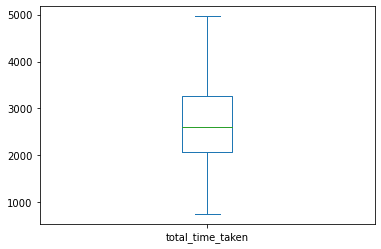

In [55]:
df_train_train['total_time_taken'].plot.box(showfliers=True)

<AxesSubplot:>

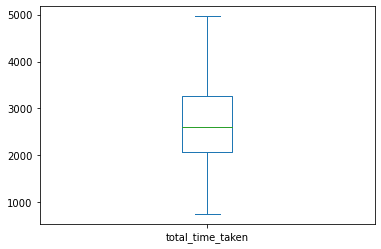

In [56]:
df_train_val['total_time_taken'].plot.box(showfliers=True)

<AxesSubplot:>

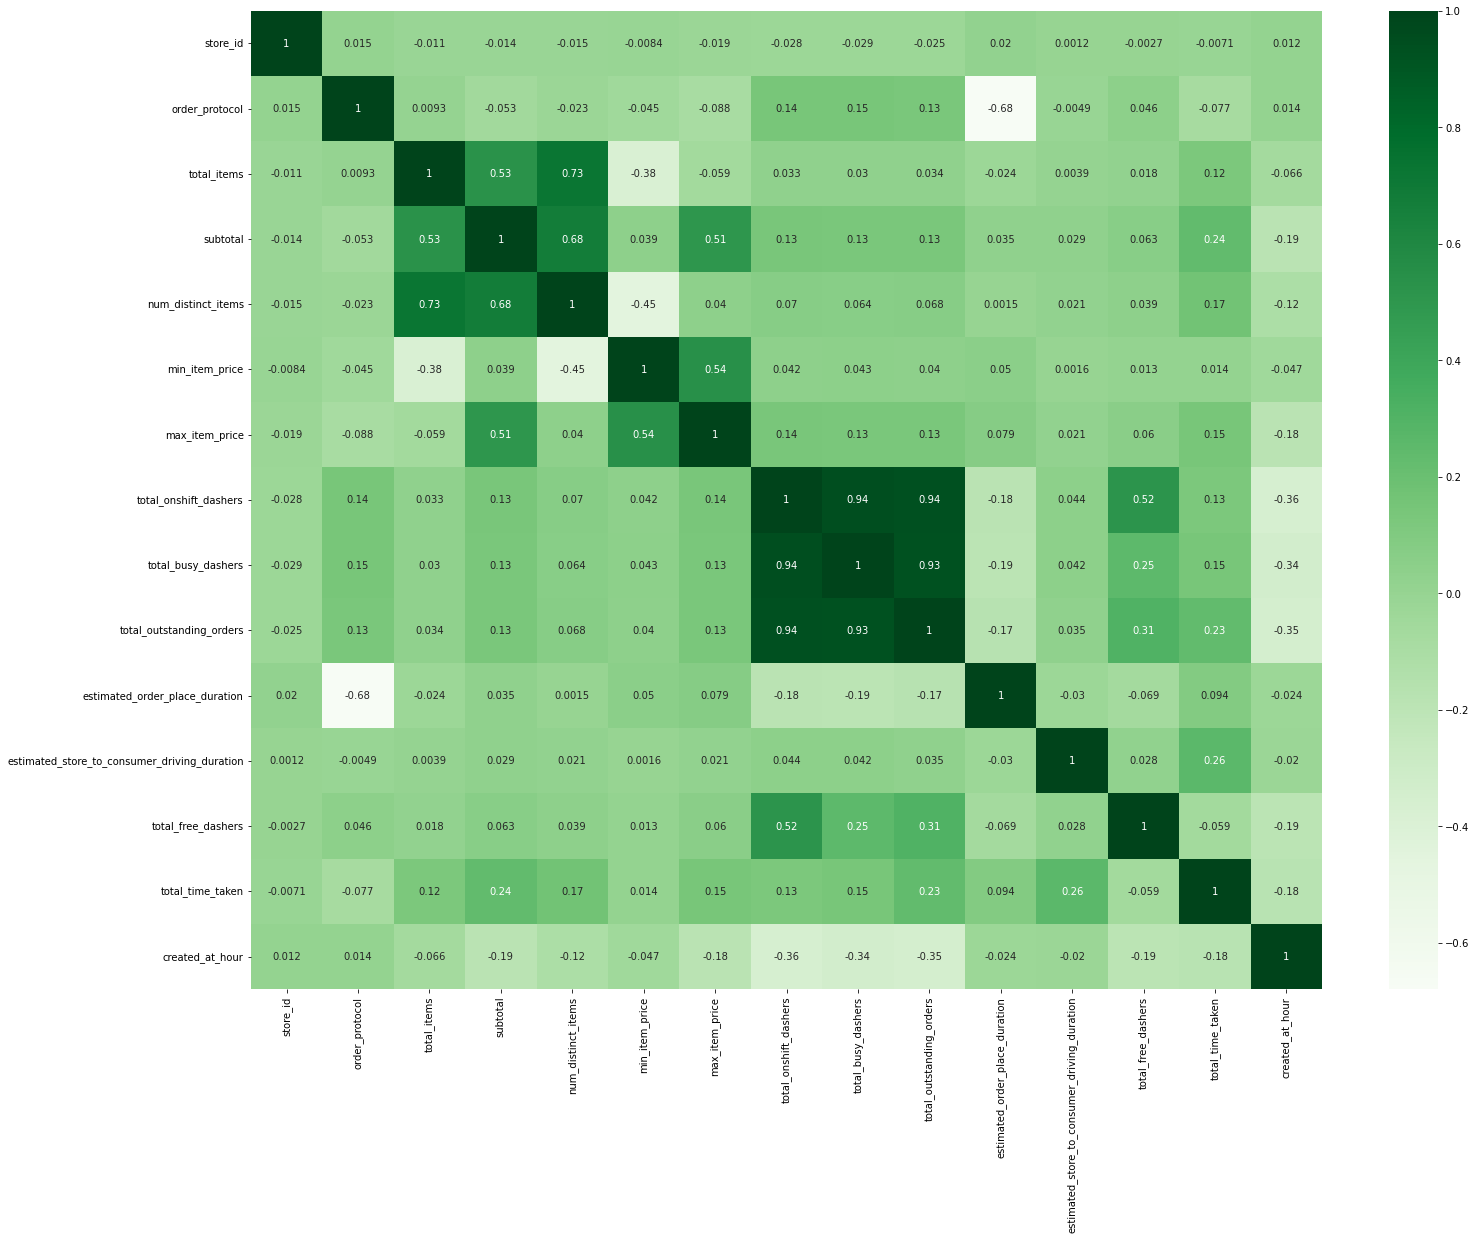

In [57]:
#Correleation matrix
f, ax = plt.subplots(figsize=(24, 18)) 
sns.heatmap(df_train_train.corr(),cmap="Greens",annot=True)


In [58]:
df_train_train.shape

(120507, 15)

In [59]:
#Training data
X_df_train_train=df_train_train.drop('total_time_taken',axis=1)
y_df_train_train=df_train_train['total_time_taken']

In [60]:
#Validation data
X_df_train_val=df_train_val.drop('total_time_taken',axis=1)
y_df_train_val=df_train_val['total_time_taken']

In [173]:
#Applying decision tree regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [135]:
dtr=DecisionTreeRegressor(max_depth=6,max_features=5)

In [178]:
scores = cross_val_score(dtr, X_df_train_train, y_df_train_train, cv=10)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.1785133  0.1916665  0.16945154 0.18376549 0.17710224 0.15682542
 0.16805429 0.1752895  0.17388334 0.17570206]


In [136]:
dtr.fit(X_df_train_train,y_df_train_train)

DecisionTreeRegressor(max_depth=6, max_features=5)

In [179]:
y_val_pred=dtr.predict(X_df_train_val)

In [184]:
from sklearn.metrics import mean_squared_error,r2_score

ImportError: cannot import name 'rmse' from 'sklearn.metrics' (C:\Users\zadea\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [181]:
mse=mean_squared_error(y_df_train_val,y_val_pred)
print('mean squared error is :',mse)
r2=r2_score(y_df_train_val,y_val_pred)
print('r squared error :',r2)

mean squared error is : 593990.7563276757
r squared error : 0.1693783414484883


In [77]:
#Applying Random forrest regressor

from sklearn.ensemble import RandomForestRegressor

In [81]:
rf=RandomForestRegressor()

In [82]:
rf.fit(X_df_train_train,y_df_train_train)

RandomForestRegressor()

In [83]:
y_val_pred_rf=rf.predict(X_df_train_val)

In [97]:
# Applying Catboost regressor
from catboost import CatBoostRegressor

In [167]:
cb=CatBoostRegressor(early_stopping_rounds=50,iterations=1000,depth=6,learning_rate=0.1)

In [168]:
cb.fit(X_df_train_train,y_df_train_train)

0:	learn: 830.7672829	total: 42.6ms	remaining: 42.5s
1:	learn: 818.4442684	total: 51.4ms	remaining: 25.7s
2:	learn: 807.8551220	total: 60.5ms	remaining: 20.1s
3:	learn: 798.9436334	total: 69.9ms	remaining: 17.4s
4:	learn: 790.7297214	total: 78.5ms	remaining: 15.6s
5:	learn: 783.9939366	total: 87.4ms	remaining: 14.5s
6:	learn: 778.0474833	total: 97.4ms	remaining: 13.8s
7:	learn: 772.5015845	total: 107ms	remaining: 13.2s
8:	learn: 767.8046425	total: 116ms	remaining: 12.8s
9:	learn: 763.8617685	total: 127ms	remaining: 12.6s
10:	learn: 759.8994244	total: 136ms	remaining: 12.2s
11:	learn: 756.6082005	total: 144ms	remaining: 11.9s
12:	learn: 753.2056584	total: 153ms	remaining: 11.6s
13:	learn: 750.6794288	total: 162ms	remaining: 11.4s
14:	learn: 747.8565293	total: 171ms	remaining: 11.2s
15:	learn: 745.5767611	total: 180ms	remaining: 11.1s
16:	learn: 743.6085759	total: 190ms	remaining: 11s
17:	learn: 741.9152643	total: 199ms	remaining: 10.8s
18:	learn: 740.3654176	total: 208ms	remaining: 10.7

158:	learn: 686.3219591	total: 1.52s	remaining: 8.05s
159:	learn: 686.2033144	total: 1.53s	remaining: 8.04s
160:	learn: 686.0681388	total: 1.54s	remaining: 8.03s
161:	learn: 685.9804465	total: 1.55s	remaining: 8.02s
162:	learn: 685.8323674	total: 1.56s	remaining: 8s
163:	learn: 685.7273116	total: 1.57s	remaining: 7.99s
164:	learn: 685.6039058	total: 1.58s	remaining: 7.98s
165:	learn: 685.4410056	total: 1.58s	remaining: 7.97s
166:	learn: 685.3029627	total: 1.59s	remaining: 7.95s
167:	learn: 685.2082317	total: 1.6s	remaining: 7.94s
168:	learn: 685.1217467	total: 1.61s	remaining: 7.93s
169:	learn: 684.9972649	total: 1.62s	remaining: 7.91s
170:	learn: 684.8651332	total: 1.63s	remaining: 7.9s
171:	learn: 684.7660224	total: 1.64s	remaining: 7.88s
172:	learn: 684.6325553	total: 1.65s	remaining: 7.87s
173:	learn: 684.4834655	total: 1.65s	remaining: 7.85s
174:	learn: 684.3953601	total: 1.66s	remaining: 7.84s
175:	learn: 684.3198902	total: 1.67s	remaining: 7.82s
176:	learn: 684.2008678	total: 1.

312:	learn: 673.8265807	total: 2.81s	remaining: 6.18s
313:	learn: 673.7635450	total: 2.83s	remaining: 6.18s
314:	learn: 673.7196275	total: 2.84s	remaining: 6.17s
315:	learn: 673.6462274	total: 2.85s	remaining: 6.17s
316:	learn: 673.5841302	total: 2.86s	remaining: 6.17s
317:	learn: 673.5254952	total: 2.87s	remaining: 6.16s
318:	learn: 673.4960752	total: 2.88s	remaining: 6.16s
319:	learn: 673.4290667	total: 2.9s	remaining: 6.15s
320:	learn: 673.3720565	total: 2.9s	remaining: 6.14s
321:	learn: 673.3273026	total: 2.92s	remaining: 6.14s
322:	learn: 673.2761723	total: 2.93s	remaining: 6.14s
323:	learn: 673.2140096	total: 2.94s	remaining: 6.13s
324:	learn: 673.1103544	total: 2.95s	remaining: 6.13s
325:	learn: 673.0173962	total: 2.96s	remaining: 6.12s
326:	learn: 672.9561076	total: 2.97s	remaining: 6.12s
327:	learn: 672.8793794	total: 2.98s	remaining: 6.11s
328:	learn: 672.8645456	total: 2.99s	remaining: 6.1s
329:	learn: 672.7745289	total: 3s	remaining: 6.1s
330:	learn: 672.7116574	total: 3.01

472:	learn: 665.1997731	total: 4.31s	remaining: 4.81s
473:	learn: 665.1489894	total: 4.32s	remaining: 4.8s
474:	learn: 665.1213654	total: 4.33s	remaining: 4.79s
475:	learn: 665.0806120	total: 4.34s	remaining: 4.78s
476:	learn: 665.0302758	total: 4.35s	remaining: 4.77s
477:	learn: 665.0024337	total: 4.36s	remaining: 4.76s
478:	learn: 664.9523693	total: 4.36s	remaining: 4.75s
479:	learn: 664.9200669	total: 4.37s	remaining: 4.74s
480:	learn: 664.8451537	total: 4.38s	remaining: 4.73s
481:	learn: 664.7710273	total: 4.39s	remaining: 4.72s
482:	learn: 664.7436506	total: 4.4s	remaining: 4.71s
483:	learn: 664.6669839	total: 4.41s	remaining: 4.7s
484:	learn: 664.6330398	total: 4.42s	remaining: 4.69s
485:	learn: 664.6120809	total: 4.42s	remaining: 4.68s
486:	learn: 664.5584565	total: 4.43s	remaining: 4.67s
487:	learn: 664.5281323	total: 4.44s	remaining: 4.66s
488:	learn: 664.4993152	total: 4.45s	remaining: 4.65s
489:	learn: 664.4582178	total: 4.46s	remaining: 4.64s
490:	learn: 664.4105916	total: 

644:	learn: 658.2776383	total: 5.77s	remaining: 3.17s
645:	learn: 658.2324502	total: 5.78s	remaining: 3.17s
646:	learn: 658.1986483	total: 5.79s	remaining: 3.16s
647:	learn: 658.1646278	total: 5.8s	remaining: 3.15s
648:	learn: 658.1308286	total: 5.8s	remaining: 3.14s
649:	learn: 658.1154218	total: 5.81s	remaining: 3.13s
650:	learn: 658.0880263	total: 5.82s	remaining: 3.12s
651:	learn: 658.0334300	total: 5.83s	remaining: 3.11s
652:	learn: 657.9880564	total: 5.84s	remaining: 3.1s
653:	learn: 657.9294073	total: 5.85s	remaining: 3.09s
654:	learn: 657.8919042	total: 5.86s	remaining: 3.08s
655:	learn: 657.8377995	total: 5.86s	remaining: 3.08s
656:	learn: 657.8132616	total: 5.87s	remaining: 3.06s
657:	learn: 657.7698719	total: 5.88s	remaining: 3.06s
658:	learn: 657.7233932	total: 5.89s	remaining: 3.05s
659:	learn: 657.7049361	total: 5.9s	remaining: 3.04s
660:	learn: 657.6517858	total: 5.91s	remaining: 3.03s
661:	learn: 657.6248854	total: 5.91s	remaining: 3.02s
662:	learn: 657.5783247	total: 5

809:	learn: 652.7480469	total: 7.25s	remaining: 1.7s
810:	learn: 652.7201724	total: 7.25s	remaining: 1.69s
811:	learn: 652.6802539	total: 7.26s	remaining: 1.68s
812:	learn: 652.6523203	total: 7.27s	remaining: 1.67s
813:	learn: 652.6207879	total: 7.28s	remaining: 1.66s
814:	learn: 652.5947625	total: 7.29s	remaining: 1.65s
815:	learn: 652.5647398	total: 7.3s	remaining: 1.65s
816:	learn: 652.5209650	total: 7.3s	remaining: 1.64s
817:	learn: 652.5069032	total: 7.31s	remaining: 1.63s
818:	learn: 652.4629520	total: 7.32s	remaining: 1.62s
819:	learn: 652.4160924	total: 7.33s	remaining: 1.61s
820:	learn: 652.3822332	total: 7.34s	remaining: 1.6s
821:	learn: 652.3489704	total: 7.35s	remaining: 1.59s
822:	learn: 652.3483340	total: 7.35s	remaining: 1.58s
823:	learn: 652.3040469	total: 7.36s	remaining: 1.57s
824:	learn: 652.2705926	total: 7.37s	remaining: 1.56s
825:	learn: 652.2275199	total: 7.38s	remaining: 1.55s
826:	learn: 652.1877164	total: 7.39s	remaining: 1.54s
827:	learn: 652.1592688	total: 7

981:	learn: 647.3182812	total: 8.71s	remaining: 160ms
982:	learn: 647.2778500	total: 8.72s	remaining: 151ms
983:	learn: 647.2609158	total: 8.73s	remaining: 142ms
984:	learn: 647.2145095	total: 8.74s	remaining: 133ms
985:	learn: 647.1942519	total: 8.74s	remaining: 124ms
986:	learn: 647.1836455	total: 8.75s	remaining: 115ms
987:	learn: 647.1459125	total: 8.76s	remaining: 106ms
988:	learn: 647.1180642	total: 8.77s	remaining: 97.5ms
989:	learn: 647.0808582	total: 8.78s	remaining: 88.7ms
990:	learn: 647.0674161	total: 8.79s	remaining: 79.8ms
991:	learn: 647.0434351	total: 8.79s	remaining: 70.9ms
992:	learn: 647.0067989	total: 8.8s	remaining: 62.1ms
993:	learn: 646.9750997	total: 8.81s	remaining: 53.2ms
994:	learn: 646.9459444	total: 8.82s	remaining: 44.3ms
995:	learn: 646.9301731	total: 8.83s	remaining: 35.4ms
996:	learn: 646.8848608	total: 8.83s	remaining: 26.6ms
997:	learn: 646.8570659	total: 8.84s	remaining: 17.7ms
998:	learn: 646.8279920	total: 8.85s	remaining: 8.86ms
999:	learn: 646.78

In [169]:
y_val_pred_cb=cb.predict(X_df_train_val)

In [170]:
mse=mean_squared_error(y_df_train_val,y_val_pred_cb)
print('mean squared error is :',mse)
r2=r2_score(y_df_train_val,y_val_pred_cb)
print('r squared error :',r2)

mean squared error is : 418336.84394707636
r squared error : 0.4150083322831408


#### Test values

In [188]:
# seperating independent and dependnt features for test data

X_test=imputed_test.drop('total_time_taken',axis=1)
y_test=imputed_test['total_time_taken']

In [189]:
y_test_pred_dtr=dtr.predict(X_test)
# y_test_pred_rf=rf.predict(X_test)
# y_test_pred_cb=cb.predict(X_test)

In [190]:
mse=mean_squared_error(y_test,y_test_pred_dtr)
print('mean squared error is for Decision tree  :',mse)
r2=r2_score(y_test,y_test_pred_dtr)
print('r squared error for Decision tree :',r2)

mean squared error is for Decision tree  : 587943.4409481715
r squared error for Decision tree : 0.1564656888530428


In [192]:
mse=mean_squared_error(y_test,y_test_pred_rf)
print('mean squared error for Random forest :',mse)
r2=r2_score(y_test,y_test_pred_rf)
print('r squared error for Random forest :',r2)

mean squared error for Random forest : 485806.7301840113
r squared error for Random forest : 0.3030032874668128


In [193]:
mse=mean_squared_error(y_test,y_test_pred_cb)
print('mean squared error for Cat Boost  :',mse)
r2=r2_score(y_test,y_test_pred_cb)
print('r squared error for Cat Boost :',r2)

mean squared error for Cat Boost  : 447336.4151944806
r squared error for Cat Boost : 0.3581974241714705


In [196]:
import math
math.sqrt(587943.4409481715)

766.774700253061